# **Pelabelan manual**

In [ ]:
!pip install Sastrawi
!pip install swifter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 11.4 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=babd99e6e5fce6505e6cc347c9a9f9a9a9f8b0a9e9468945120b531645574bdb
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import swifter
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import requests

nltk.download('punkt')
nltk.download('stopwords')

Mounted at /content/gdrive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#%cd /content/gdrive/MyDrive/Colab\ Notebooks/3/
%cd /content/gdrive/MyDrive/Colab\ Notebooks/!Materi\ JDD\ 2024/ml-sa/Manual/

/content/gdrive/MyDrive/Colab Notebooks/!Materi JDD 2024/ml-sa/Manual


In [6]:
#tweet = pd.read_csv('/content/gdrive/MyDrive/Skripsweeet/Dataset tweet/Dataset urut label.csv')
tweet = pd.read_excel('data.xlsx')
tweet

,created_at,full_text,user_id_str,label
0,2020-02-17 13:23:35,Milenial kerja bareng gen Z itu rasanya seru!,45166360,Positif
1,2020-04-16 23:03:50,Dari hasil saya berinteraksi dan kerja bareng ...,31361565,Positif
2,2020-07-12 02:33:22,Aku anak gen Z bang tapi di tempat kerja banya...,890518417760899074,Netral
3,2020-08-12 09:57:14,aku dapet kerja yang sekarang pake cv yang kan...,633521227,Netral
4,2020-10-02 05:47:36,Kerja bareng anak gen z berasa kayak nge gank ...,1643126222,Negatif
...,...,...,...,...
995,2024-04-15 08:06:46,Saya punya rekan kerja anak gen z sering live ...,1634566340018339841,Netral
996,2024-04-16 08:18:06,Kadang saya bingung sama gen z ini kalo soal t...,340770659,Negatif
997,2024-04-18 14:28:21,kerja saja milih-milih kelakuan gen z,1224276826760990720,Negatif
998,2024-04-22 03:34:37,Suatu hari ada Gen Z dan Gen X bersatu dalam d...,135337641,Netral


In [7]:
tweet.shape

(1000, 4)

In [8]:
tweet.dtypes

,0
created_at,datetime64[ns]
full_text,object
user_id_str,int64
label,object


In [9]:
tweet.columns

Index(['created_at', 'full_text', 'user_id_str', 'label'], dtype='object')

In [10]:
tweet.isnull().sum()

,0
created_at,0
full_text,0
user_id_str,0
label,0


## **Preprocessing**

In [11]:
columns_to_remove = ["created_at","user_id_str"]
tweet = tweet.drop(columns=columns_to_remove)

In [12]:
tweet = tweet.rename(columns={"full_text": "Text"})

In [13]:
tweet['label'] = tweet['label'].replace({'Positif': 0, 'Negatif': 1, 'Netral' : 2})

In [14]:
tweet.head(1000)

,Text,label
0,Milenial kerja bareng gen Z itu rasanya seru!,0
1,Dari hasil saya berinteraksi dan kerja bareng ...,0
2,Aku anak gen Z bang tapi di tempat kerja banya...,2
3,aku dapet kerja yang sekarang pake cv yang kan...,2
4,Kerja bareng anak gen z berasa kayak nge gank ...,1
...,...,...
995,Saya punya rekan kerja anak gen z sering live ...,2
996,Kadang saya bingung sama gen z ini kalo soal t...,1
997,kerja saja milih-milih kelakuan gen z,1
998,Suatu hari ada Gen Z dan Gen X bersatu dalam d...,2


### **case folding**

In [15]:
tweet['Text Case Folding'] = tweet['Text'].str.lower()


print('Case Folding Result : \n')
print(tweet['Text Case Folding'].head(5))
print('\n\n\n')

Case Folding Result : 

0        milenial kerja bareng gen z itu rasanya seru!
1    dari hasil saya berinteraksi dan kerja bareng ...
2    aku anak gen z bang tapi di tempat kerja banya...
3    aku dapet kerja yang sekarang pake cv yang kan...
4    kerja bareng anak gen z berasa kayak nge gank ...
Name: Text Case Folding, dtype: object






### **Tokenizing**

In [16]:
# Tokenizing
def clean_text(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[@#]\w+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\b(?![zZ])[a-zA-Z]\b', '', text)
    return text.strip()

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(clean_text)
tweet['Text Tokenizing'] = tweet['Text Case Folding'].apply(word_tokenize)
print('Tokenizing Result : \n')
print(tweet['Text Tokenizing'].head())
print('\n\n\n')

Tokenizing Result : 

0    [milenial, kerja, bareng, gen, z, itu, rasanya...
1    [dari, hasil, saya, berinteraksi, dan, kerja, ...
2    [aku, anak, gen, z, bang, tapi, di, tempat, ke...
3    [aku, dapet, kerja, yang, sekarang, pake, cv, ...
4    [kerja, bareng, anak, gen, z, berasa, kayak, n...
Name: Text Tokenizing, dtype: object






### **Normalization**

### **Stemming**

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stem_cache = {}

def stemmed_wrapper(term):
    if term not in stem_cache:
        stem_cache[term] = stemmer.stem(term)
    return stem_cache[term]

tweet['Text Stemming'] = tweet['Text Tokenizing'].swifter.apply(lambda x: [stemmed_wrapper(term) for term in x])
print(tweet['Text Stemming'])

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

0      [milenial, kerja, bareng, gen, z, itu, rasa, s...
1      [dari, hasil, saya, interaksi, dan, kerja, bar...
2      [aku, anak, gen, z, bang, tapi, di, tempat, ke...
3      [aku, dapet, kerja, yang, sekarang, pake, cv, ...
4      [kerja, bareng, anak, gen, z, asa, kayak, nge,...
                             ...                        
995    [saya, punya, rekan, kerja, anak, gen, z, seri...
996    [kadang, saya, bingung, sama, gen, z, ini, kal...
997            [kerja, saja, milih, milih, laku, gen, z]
998    [suatu, hari, ada, gen, z, dan, gen, satu, dal...
999    [terus, gimana, nasib, karier, gen, z, ke, dep...
Name: Text Stemming, Length: 1000, dtype: object


### **Filtering**

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
list_stopwords = stopwords.words('indonesian')
additional_stopwords = ["yg", "dg", "rt", "dgn", "ny", 'klo', 'kalo', '&amp','amp', 'biar', 'bikin', 'bilang',
                        'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                        'jd', 'jgn', 'sdh', 'aja', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', '&amp',
                        'yah', 'sdgkan', 'sdg', 'emg', 'sm', 'pls', 'mlu', 'ken', 'allah', 'brb', 'btw',
                        'b/c', 'cod', 'cmiiw', 'fyi', 'gg', 'ggwp', 'idk', 'ikr', 'lol', 'ootd', 'lmao',
                        'oot', 'pap', 'otw', 'tfl', 'vc', 'ygy', 'sih', 'iya', 'kayak', 'enggak', 'cari',
                        'kali', 'pas', 'mah', 'pilih', 'ku', 'deh', 'bla', 'sok', 'an', 'blak','nge','lah',
                        "dan", "di", "dari", "ke", "oleh", "pada", "untuk"]

list_stopwords.extend(additional_stopwords)
list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweet['Text Filtering'] = tweet['Text Stemming'].apply(stopwords_removal)
print(tweet['Text Filtering'].head())


0              [milenial, kerja, bareng, gen, z, seru]
1    [hasil, interaksi, kerja, bareng, gen, z, gene...
2    [anak, gen, z, bang, kerja, orang, milenials, ...
3    [dapet, kerja, pake, cv, kanan, bidang, non, k...
4    [kerja, bareng, anak, gen, z, asa, gank, jaman...
Name: Text Filtering, dtype: object


In [22]:
tweet.head()

,Text,label,Text Case Folding,Text Tokenizing,Text Stemming,Text Filtering
0,Milenial kerja bareng gen Z itu rasanya seru!,0,milenial kerja bareng gen z itu rasanya seru,"[milenial, kerja, bareng, gen, z, itu, rasanya...","[milenial, kerja, bareng, gen, z, itu, rasa, s...","[milenial, kerja, bareng, gen, z, seru]"
1,Dari hasil saya berinteraksi dan kerja bareng ...,0,dari hasil saya berinteraksi dan kerja bareng ...,"[dari, hasil, saya, berinteraksi, dan, kerja, ...","[dari, hasil, saya, interaksi, dan, kerja, bar...","[hasil, interaksi, kerja, bareng, gen, z, gene..."
2,Aku anak gen Z bang tapi di tempat kerja banya...,2,aku anak gen z bang tapi di tempat kerja banya...,"[aku, anak, gen, z, bang, tapi, di, tempat, ke...","[aku, anak, gen, z, bang, tapi, di, tempat, ke...","[anak, gen, z, bang, kerja, orang, milenials, ..."
3,aku dapet kerja yang sekarang pake cv yang kan...,2,aku dapet kerja yang sekarang pake cv yang kan...,"[aku, dapet, kerja, yang, sekarang, pake, cv, ...","[aku, dapet, kerja, yang, sekarang, pake, cv, ...","[dapet, kerja, pake, cv, kanan, bidang, non, k..."
4,Kerja bareng anak gen z berasa kayak nge gank ...,1,kerja bareng anak gen z berasa kayak nge gank ...,"[kerja, bareng, anak, gen, z, berasa, kayak, n...","[kerja, bareng, anak, gen, z, asa, kayak, nge,...","[kerja, bareng, anak, gen, z, asa, gank, jaman..."


### **save preprocessing result**

In [23]:
tweet.to_csv("preprocessing results", index=False)
tweet.head()

,Text,label,Text Case Folding,Text Tokenizing,Text Stemming,Text Filtering
0,Milenial kerja bareng gen Z itu rasanya seru!,0,milenial kerja bareng gen z itu rasanya seru,"[milenial, kerja, bareng, gen, z, itu, rasanya...","[milenial, kerja, bareng, gen, z, itu, rasa, s...","[milenial, kerja, bareng, gen, z, seru]"
1,Dari hasil saya berinteraksi dan kerja bareng ...,0,dari hasil saya berinteraksi dan kerja bareng ...,"[dari, hasil, saya, berinteraksi, dan, kerja, ...","[dari, hasil, saya, interaksi, dan, kerja, bar...","[hasil, interaksi, kerja, bareng, gen, z, gene..."
2,Aku anak gen Z bang tapi di tempat kerja banya...,2,aku anak gen z bang tapi di tempat kerja banya...,"[aku, anak, gen, z, bang, tapi, di, tempat, ke...","[aku, anak, gen, z, bang, tapi, di, tempat, ke...","[anak, gen, z, bang, kerja, orang, milenials, ..."
3,aku dapet kerja yang sekarang pake cv yang kan...,2,aku dapet kerja yang sekarang pake cv yang kan...,"[aku, dapet, kerja, yang, sekarang, pake, cv, ...","[aku, dapet, kerja, yang, sekarang, pake, cv, ...","[dapet, kerja, pake, cv, kanan, bidang, non, k..."
4,Kerja bareng anak gen z berasa kayak nge gank ...,1,kerja bareng anak gen z berasa kayak nge gank ...,"[kerja, bareng, anak, gen, z, berasa, kayak, n...","[kerja, bareng, anak, gen, z, asa, kayak, nge,...","[kerja, bareng, anak, gen, z, asa, gank, jaman..."


In [25]:
df= tweet.drop(columns=['Text', 'Text Case Folding', 'Text Tokenizing', 'Text Stemming'])
df.head()

,label,Text Filtering
0,0,"[milenial, kerja, bareng, gen, z, seru]"
1,0,"[hasil, interaksi, kerja, bareng, gen, z, gene..."
2,2,"[anak, gen, z, bang, kerja, orang, milenials, ..."
3,2,"[dapet, kerja, pake, cv, kanan, bidang, non, k..."
4,1,"[kerja, bareng, anak, gen, z, asa, gank, jaman..."


In [26]:
df['Text Filtering'] = df['Text Filtering'].apply(' '.join)
df.head(10)

,label,Text Filtering
0,0,milenial kerja bareng gen z seru
1,0,hasil interaksi kerja bareng gen z generasi mi...
2,2,anak gen z bang kerja orang milenials boomers ...
3,2,dapet kerja pake cv kanan bidang non kreatif e...
4,1,kerja bareng anak gen z asa gank jaman smp sma...
5,0,mending kerja bareng gen z
6,1,bener bener tua ketemu laku gen z aneh aneh in...
7,1,liat twit doi stress kerja bareng milennial ge...
8,1,capek gen kerja bareng gen boomer ngadepin mah...
9,1,orang kerja prank mental anak gen z


In [27]:
review = {
    'Text Filtering': df['Text Filtering'].tolist(),
    'Sentimen': df['label'].tolist(),
}
result = pd.DataFrame(review)
result

,Text Filtering,Sentimen
0,milenial kerja bareng gen z seru,0
1,hasil interaksi kerja bareng gen z generasi mi...,0
2,anak gen z bang kerja orang milenials boomers ...,2
3,dapet kerja pake cv kanan bidang non kreatif e...,2
4,kerja bareng anak gen z asa gank jaman smp sma...,1
...,...,...
995,rekan kerja anak gen z live ig nonton capekr g...,2
996,kadang bingung gen z teknologi update update i...,1
997,kerja milih milih laku gen z,1
998,gen z gen dunia kerja gin,2


In [28]:
result ['Sentimen'].value_counts()

,count
Sentimen,
1,695
0,160
2,145


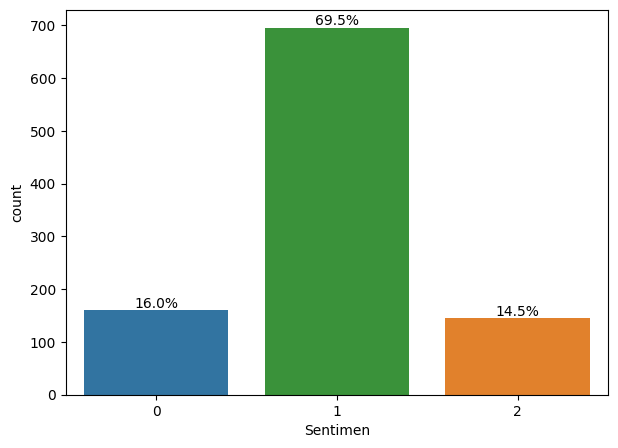

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]
sentimen_order = [0, 1, 2]

plt.figure(figsize=(7, 5))
g = sns.countplot(x='Sentimen', data=result, palette=colors, order=sentimen_order)

ax = g.axes
for p in ax.patches:
    ax.annotate(f"{p.get_height() * 100 / result.shape[0]:.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')

plt.show()


### **labeling result wordcloud**

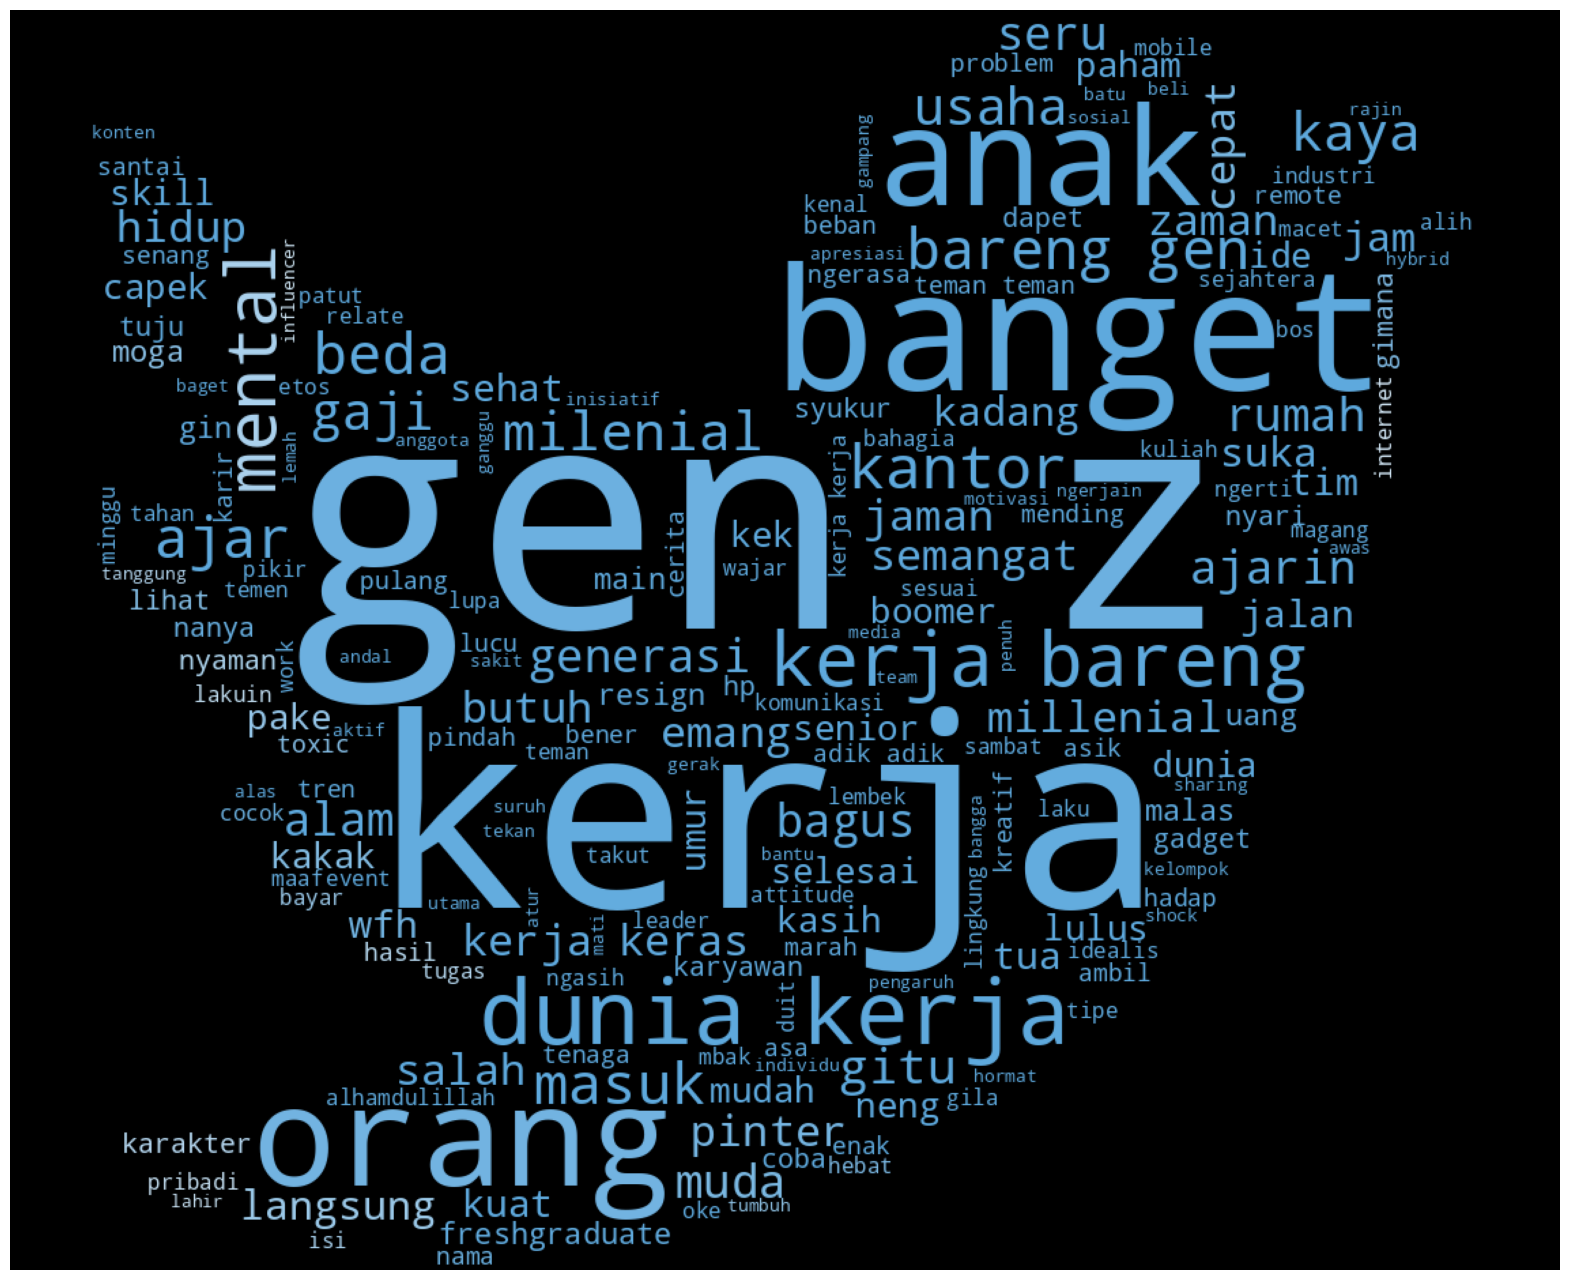

In [30]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import requests
import matplotlib.pyplot as plt

def wordcloud():
    mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
    image_colors = ImageColorGenerator(mask)

    text = ' '.join(new_df['Text Filtering'])

    wc = WordCloud(background_color='black', height=1500, width=4000, mask=mask).generate(text)

    plt.figure(figsize=(20,20))
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")
    plt.axis('off')
    plt.show()

new_df = result[result['Sentimen'] == 0]

wordcloud()


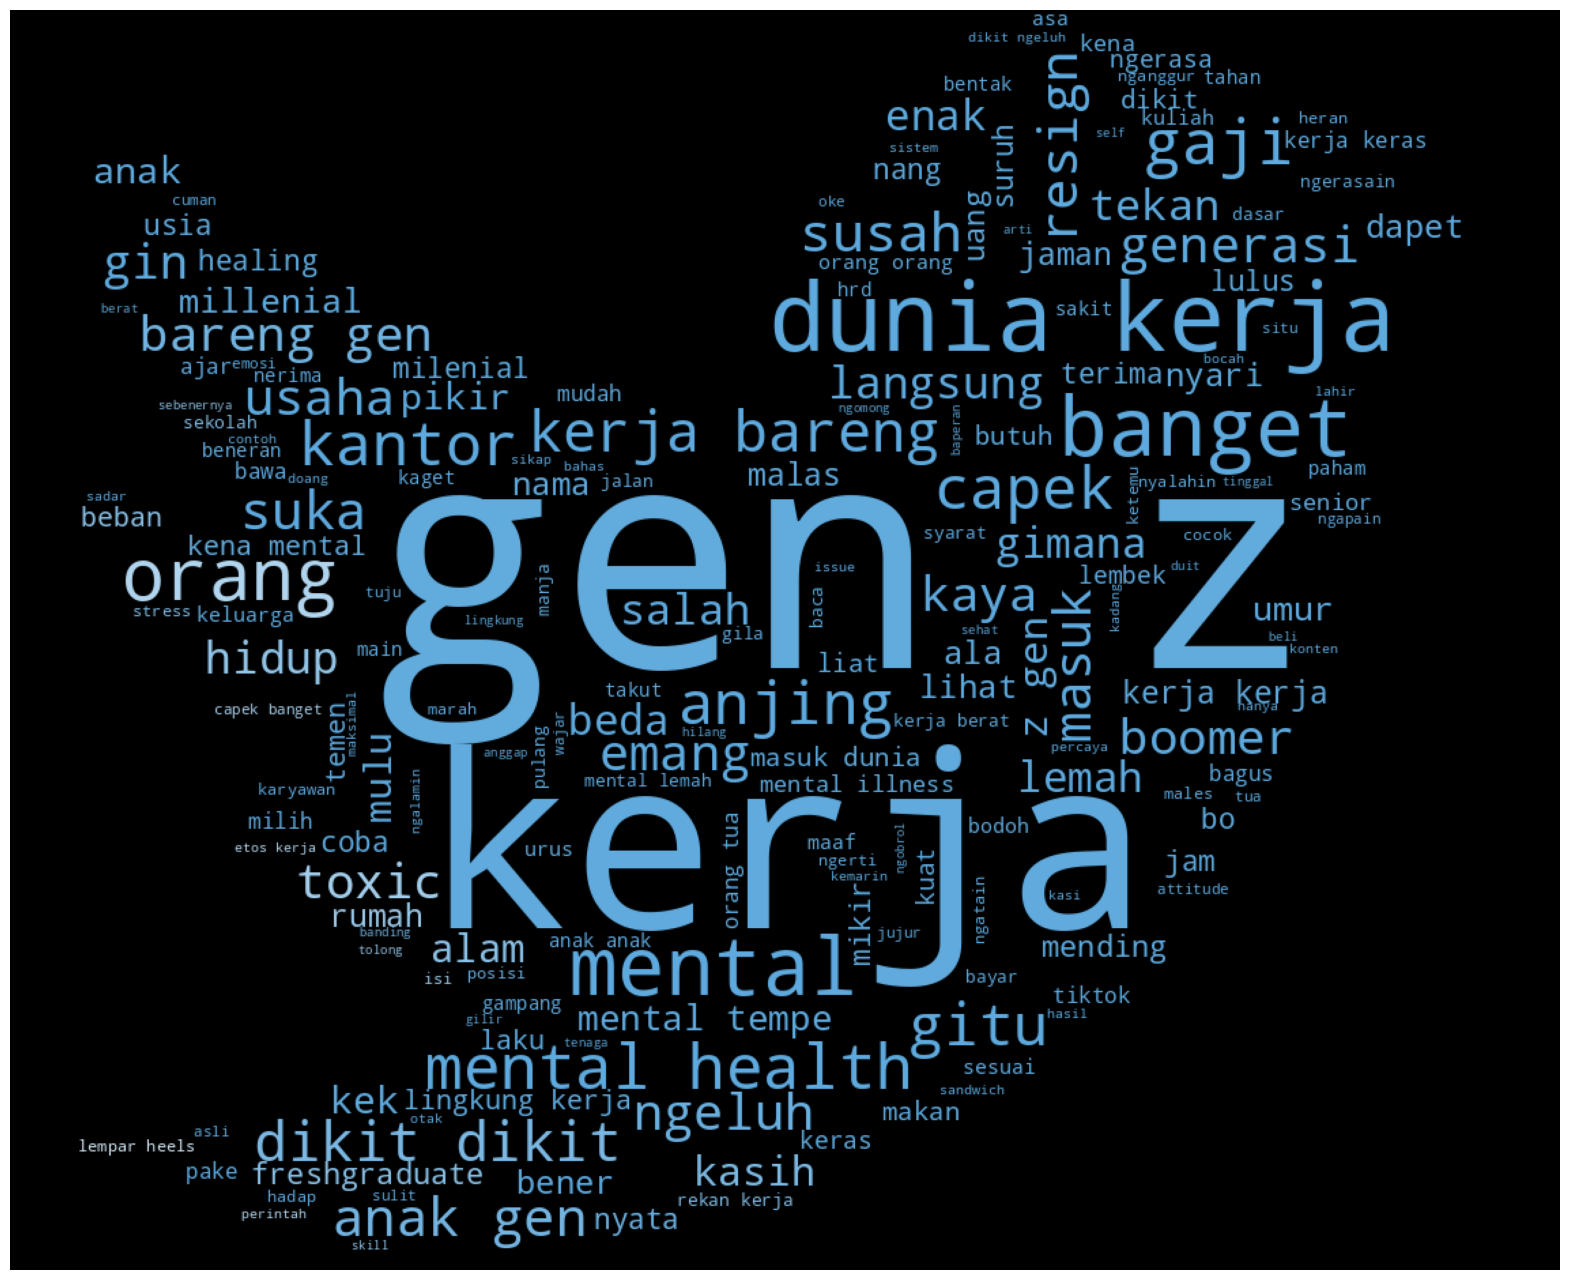

In [31]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import requests
import matplotlib.pyplot as plt

def wordcloud():
    mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
    image_colors = ImageColorGenerator(mask)

    text = ' '.join(new_df['Text Filtering'])

    wc = WordCloud(background_color='black', height=1500, width=4000, mask=mask).generate(text)

    plt.figure(figsize=(20,20))
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")
    plt.axis('off')
    plt.show()

new_df = result[result['Sentimen'] == 1]

wordcloud()


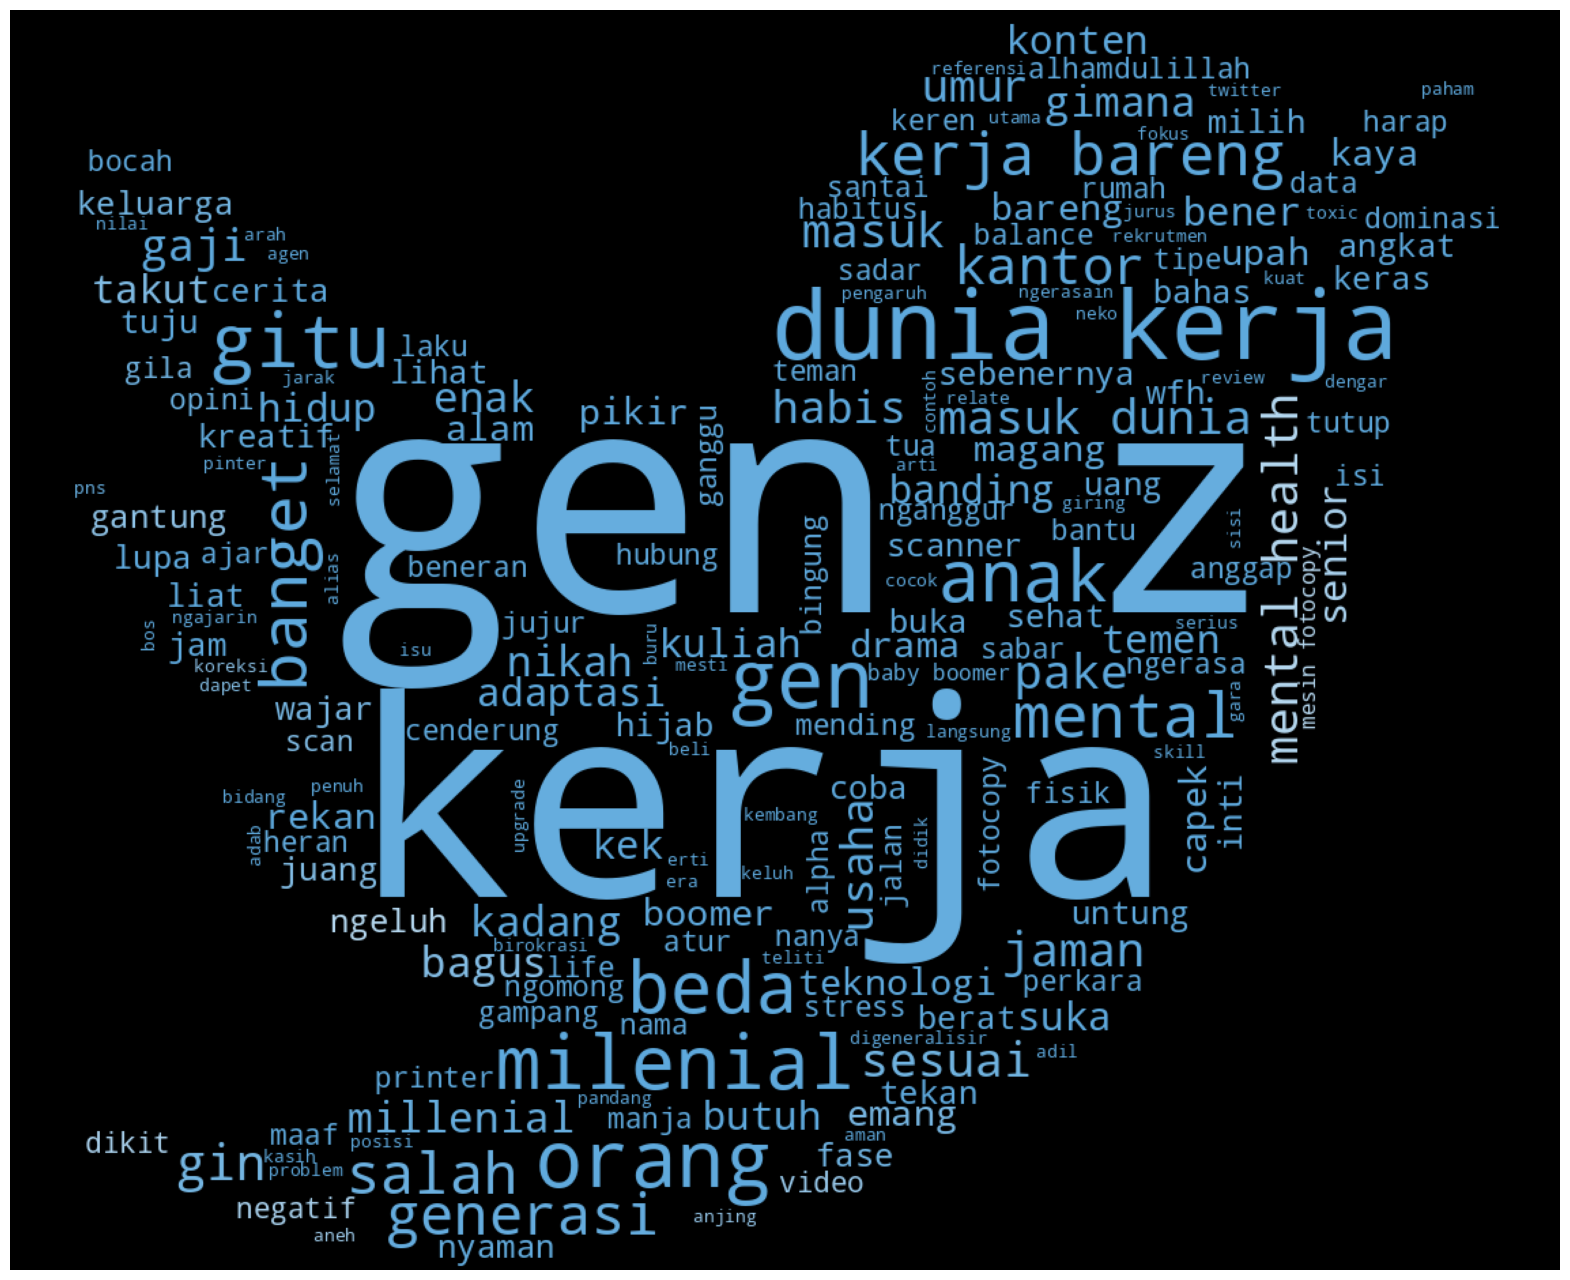

In [32]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import requests
import matplotlib.pyplot as plt

def wordcloud():
    mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
    image_colors = ImageColorGenerator(mask)

    text = ' '.join(new_df['Text Filtering'])

    wc = WordCloud(background_color='black', height=1500, width=4000, mask=mask).generate(text)

    plt.figure(figsize=(20,20))
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")
    plt.axis('off')
    plt.show()

new_df = result[result['Sentimen'] == 2]

wordcloud()


### **Modelling**

In [33]:
X = result["Text Filtering"]
y = result["Sentimen"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Train Data:", len(X_train))
print("Test Data:", len(X_test))

Train Data: 700
Test Data: 300


In [35]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('indonesian'), ngram_range=(1, 2))

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

feature_names = tfidf_vectorizer.get_feature_names_out()

df_tfidf_vectorizer = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)
df_tfidf_vectorizer.head()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


,abis,adaptasi,ajar,ajarin,akal,alam,alam kerja,alas,ambil,anak,...,uang,umur,untung,usaha,usia,wajar,wfh,work,work life,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.477124,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train = tfidf_vectorizer.transform(X_train)
X_test  = tfidf_vectorizer.transform(X_test)
print(f'Inset TF IDF Data Transformed.')

Inset TF IDF Data Transformed.


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

text_classifier_nb = MultinomialNB()
text_classifier_nb.fit(X_train, y_train)

MultinomialNB()

In [38]:
nb_predictions = text_classifier_nb.predict(X_test)

In [40]:
nb_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Confusion matrix: 
 [[  1  41   1]
 [  1 208   0]
 [  1  46   1]]
Classification report: 
               precision    recall  f1-score   support

           0       0.33      0.02      0.04        43
           1       0.71      1.00      0.83       209
           2       0.50      0.02      0.04        48

    accuracy                           0.70       300
   macro avg       0.51      0.35      0.30       300
weighted avg       0.62      0.70      0.59       300

Accuracy using Naive Bayes: 0.7


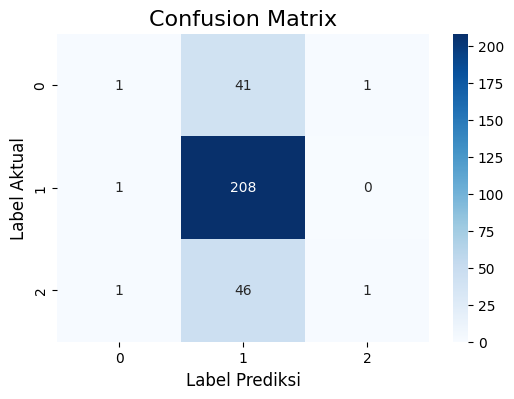

In [41]:
cm = confusion_matrix(y_test, nb_predictions)
cr = classification_report(y_test, nb_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print('Confusion matrix: \n', cm)
print('Classification report: \n', cr)
print(f'Accuracy using Naive Bayes: {nb_accuracy}')

plt.figure(figsize=(6,4))
sentiment_classes = ['0', '1', '2']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Label Aktual', fontsize=12)
plt.xlabel('Label Prediksi', fontsize=12)
plt.show()

### Pengujian Confusion Matrix Menggunakan 5-fold

Confusion matrix with 5-fold cross-validation: 
 [[  6 154   0]
 [  0 694   1]
 [  4 140   1]]


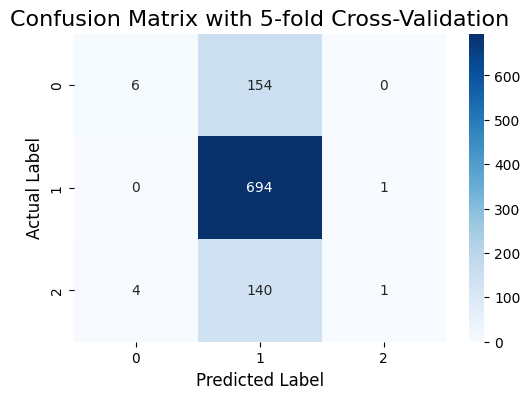


Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.69      1.00      0.82       139
           2       0.00      0.00      0.00        29

    accuracy                           0.69       200
   macro avg       0.23      0.33      0.27       200
weighted avg       0.48      0.69      0.57       200


Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        32
           1       0.71      1.00      0.83       139
           2       1.00      0.03      0.07        29

    accuracy                           0.71       200
   macro avg       0.90      0.37      0.34       200
weighted avg       0.80      0.71      0.60       200


Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.70 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

skfolds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

X_tfidf = tfidf_vectorizer.transform(X)

nb_predictions_cv = cross_val_predict(text_classifier_nb, X_tfidf, y, cv=skfolds)

cm_cv = confusion_matrix(y, nb_predictions_cv)

print('Confusion matrix with 5-fold cross-validation: \n', cm_cv)

plt.figure(figsize=(6,4))
sns.heatmap(cm_cv, cmap=plt.cm.Blues, annot=True, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix with 5-fold Cross-Validation', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

for fold, (train_idx, test_idx) in enumerate(skfolds.split(X_tfidf, y)):
    X_train_fold = X_tfidf[train_idx]
    y_train_fold = y[train_idx]
    X_test_fold = X_tfidf[test_idx]
    y_test_fold = y[test_idx]

    text_classifier_nb.fit(X_train_fold, y_train_fold)
    nb_predictions_fold = text_classifier_nb.predict(X_test_fold)

    print(f'\nClassification Report for Fold {fold + 1}:')
    print(classification_report(y_test_fold, nb_predictions_fold))
